# 2024 Crime Data In Los Angeles
## Spring 2024 Data Science Project
Group Members:
- Eesha Kurella - 118707853, Contribution: 100%
- Sanjana Gangishetty - 118909103, Contribution: 100%
- Mohith Nagendra - 119335635, Contribution: 100%

"We, all team members, agree together that the above information is true, and we are confident about our contributions to this submitted project/final tutorial."

Mohith Nagendra 5/5/2024

Sanjana Gangishetty 5/5/2024

Eesha Kurella 5/6/2024

**Members Contributions**

Mohith Nagendra - We approached each section as a team and went through it together making sure to look over each others work. So there was involvement from each team member on every aspect of the project.

Sanjana Gangishetty - We approached each section as a team and went through it together making sure to look over each others work. So there was involvement from each team member on every aspect of the project.

Eesha Kurella - We approached each section as a team and went through it together making sure to look over each others work. So there was involvement from each team member on every aspect of the project.

# **Introduction**
The purpose of this project is to use data to explore one of society's most pressing concerns: crime. We are specifically focusing on 2024 crime data in Los Angeles. Throughout this tutorial we hope to answer the questions: "What insights can be obtain from these crime statistics, and how can they inform our understanding of the societal dynamics at play in Los Angeles?" We hope to find trends among different demographics of victims in order to create predictive models that can help in cases where there is a lack of vital information.

By explaining crime trends and identifying potential correlations with demographic variables, economic indicators, and societal factors, we aim to inform residents of Los Angeles with the knowledge necessary to stay safe and create a safer and more resilient community.

Overall, our project represents a convergence of data science and social impact. By using the power of data analytics, we seek to contribute to the creation of a more just and equitable society.

# **Data Collection**

This is the first stage in the data life cycle. The focus here is retrieving the data we want to analyze and work on.

For our purposes we will be utilizing the Crime Data from 2020 to Present in the city of Los Angeles. We found this data set from data.gov at https://catalog.data.gov/dataset/crime-data-from-2020-to-present.

Download the csv (Comma Seperated Values) file of the file data from the above link so that we can access and analyze it.

# **Data Preprocessing**

For the purposes of this project we will be utilizing Google Colab to create and utilize a notebook for data analysis. So, now that we have our csv file with the data we want to first create a new Colab notebook and then click on the files button to import the csv file we downloaded. Now let's import the libraries that we will use to manipulate & analyze the data.

**Imports**

In [157]:
import pandas as pd
import scipy
from datetime import date
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve
import seaborn as sns

For more information on these libraries please reference their documentation:

- Pandas: https://pandas.pydata.org/
- Scipy: https://docs.scipy.org/doc/scipy/
- datetime: https://docs.python.org/3/library/datetime.html
- matplotlib.pyplot: https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html

Now let's use the pandas library to read the csv file and put the data into a DataFrame (we can manipulate it and use it for our analysis):

In [158]:
# df is the dataframe that will hold all the crime data from the csv file
df = pd.read_csv("Crime_Data_from_2020_to_Present.csv")
# display the dataframe so we can actually see the tabular format of the data rather than the previous comma separated format
display(df)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938452,241604405,01/14/2024 12:00:00 AM,01/13/2024 12:00:00 AM,720,16,Foothill,1673,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,8700 LANKERSHIM BL,NaN,34.2271,-118.3878
938453,242106032,02/20/2024 12:00:00 AM,02/17/2024 12:00:00 AM,2330,21,Topanga,2103,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,IC,Invest Cont,420.0,NaN,NaN,NaN,22700 NAPA ST,NaN,34.2260,-118.6214
938454,242004546,01/16/2024 12:00:00 AM,01/16/2024 12:00:00 AM,1510,20,Olympic,2013,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,HOBART BL,3RD ST,34.0690,-118.3054
938455,240104953,01/15/2024 12:00:00 AM,01/15/2024 12:00:00 AM,100,1,Central,101,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,NaN,NaN,NaN,1300 W SUNSET BL,NaN,34.0685,-118.2460


**Shape:** Let's check the data frame's dimensions using df.shape to understand the number of rows (observations) and columns (features).

In [159]:
df.shape

(938457, 28)

In [160]:
df.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

**Column Data Types:** In the last code block we saw what the columns are. Now let's investigate the data types of these columns using df.dtypes to identify potential issues.

In [161]:
df.dtypes

DR_NO               int64
Date Rptd          object
DATE OCC           object
TIME OCC            int64
AREA                int64
AREA NAME          object
Rpt Dist No         int64
Part 1-2            int64
Crm Cd              int64
Crm Cd Desc        object
Mocodes            object
Vict Age            int64
Vict Sex           object
Vict Descent       object
Premis Cd         float64
Premis Desc        object
Weapon Used Cd    float64
Weapon Desc        object
Status             object
Status Desc        object
Crm Cd 1          float64
Crm Cd 2          float64
Crm Cd 3          float64
Crm Cd 4          float64
LOCATION           object
Cross Street       object
LAT               float64
LON               float64
dtype: object

Observe from the output above that the 'DATE OCC' and 'Date Rptd' are not of the data type datetime which is not ideal. So let's transform those columns to change the data type from object to datetime! While we do that we also only want to examine the most recent data for this project so we will clean the data and keep only the crimes which occured in 2024.

In [162]:
# Let's convert the 'DATE OCC' to datetime format
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])
# Now let's filter the data and only keep the crime data which occured in 2024
df = df[df['DATE OCC'].dt.year == 2024]
# Let's also convert the 'Date Rptd' to datetime format
# note: we did this conversion after filtering the data so that we could save
#       processing time since we don't need to convert rows for data we don't end up using
df['Date Rptd'] = pd.to_datetime(df['Date Rptd'])
df

<ipython-input-162-fbcd613a8dee>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])
<ipython-input-162-fbcd613a8dee>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date Rptd'] = pd.to_datetime(df['Date Rptd'])
<ipython-input-162-fbcd613a8dee>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date Rptd'] = pd.to_datetime(df['Date Rptd'])


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
875845,240604934,2024-01-21,2024-01-21,1510,6,Hollywood,668,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,1300 N WESTERN AV,NaN,34.0944,-118.3125
875846,242107187,2024-03-22,2024-03-22,1815,21,Topanga,2145,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,22000 GILMORE ST,NaN,34.1876,-118.6070
875847,241408080,2024-04-01,2024-04-01,1920,14,Pacific,1432,1,310,BURGLARY,...,AA,Adult Arrest,310.0,998.0,NaN,NaN,800 VENICE BL,NaN,33.9939,-118.4533
875848,240904953,2024-01-28,2024-01-26,1808,9,Van Nuys,932,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,14800 VICTORY BL,NaN,34.1867,-118.4553
875849,241507368,2024-03-10,2024-03-10,420,15,N Hollywood,1555,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,ELMER AV,CAMARILLO ST,34.1577,-118.3763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938452,241604405,2024-01-14,2024-01-13,720,16,Foothill,1673,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,8700 LANKERSHIM BL,NaN,34.2271,-118.3878
938453,242106032,2024-02-20,2024-02-17,2330,21,Topanga,2103,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,IC,Invest Cont,420.0,NaN,NaN,NaN,22700 NAPA ST,NaN,34.2260,-118.6214
938454,242004546,2024-01-16,2024-01-16,1510,20,Olympic,2013,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,HOBART BL,3RD ST,34.0690,-118.3054
938455,240104953,2024-01-15,2024-01-15,100,1,Central,101,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,NaN,NaN,NaN,1300 W SUNSET BL,NaN,34.0685,-118.2460


Also observe that the data in TIME OCC column is in military time and is stored as an 64bit integer (we know this from running dtypes() earlier). So let's reformat the TIME OCC column to make it datetime format. But let's keep it in military time to make it easier to distinguish different timestamps without having to distinguish AM and PM.

In [163]:
df['TIME OCC'] = df['TIME OCC'].apply(lambda x: str(x).zfill(4))
df['TIME OCC'] = pd.to_datetime(df['TIME OCC'], format = '%H%M').dt.strftime('%H:%M')
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
875845,240604934,2024-01-21,2024-01-21,15:10,6,Hollywood,668,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,1300 N WESTERN AV,NaN,34.0944,-118.3125
875846,242107187,2024-03-22,2024-03-22,18:15,21,Topanga,2145,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,22000 GILMORE ST,NaN,34.1876,-118.6070
875847,241408080,2024-04-01,2024-04-01,19:20,14,Pacific,1432,1,310,BURGLARY,...,AA,Adult Arrest,310.0,998.0,NaN,NaN,800 VENICE BL,NaN,33.9939,-118.4533
875848,240904953,2024-01-28,2024-01-26,18:08,9,Van Nuys,932,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,14800 VICTORY BL,NaN,34.1867,-118.4553
875849,241507368,2024-03-10,2024-03-10,04:20,15,N Hollywood,1555,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,ELMER AV,CAMARILLO ST,34.1577,-118.3763


In [164]:
df.count()

DR_NO             62612
Date Rptd         62612
DATE OCC          62612
TIME OCC          62612
AREA              62612
AREA NAME         62612
Rpt Dist No       62612
Part 1-2          62612
Crm Cd            62612
Crm Cd Desc       62612
Mocodes           52184
Vict Age          62612
Vict Sex          52461
Vict Descent      52459
Premis Cd         62612
Premis Desc       62581
Weapon Used Cd    19816
Weapon Desc       19816
Status            62612
Status Desc       62612
Crm Cd 1          62612
Crm Cd 2           4000
Crm Cd 3            109
Crm Cd 4              3
LOCATION          62612
Cross Street       8421
LAT               62612
LON               62612
dtype: int64

Next, observe that Crm Cd and the other Crm Cd columns have the same data because they describe the same information about the crime that was committed but just about the levels it falls under. Additionally, the values in columns Crm Cd 2-4 provide information about non-primary crime that was committed. Since such a small percentage of our data has additional crimes, we do not want to focus on that in our analysis and we just want to focus on the primary crime, which we already have information about. Thus, let's drop columns Crm Cd 1, Crm Cd 2, Crm Cd 3, Crm Cd 4.

In [165]:
df.drop(['Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4'], axis = 1, inplace=True)
display(df.head())
print(df.columns)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,LOCATION,Cross Street,LAT,LON
875845,240604934,2024-01-21,2024-01-21,15:10,6,Hollywood,668,2,624,BATTERY - SIMPLE ASSAULT,...,517.0,MISSIONS/SHELTERS,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,1300 N WESTERN AV,NaN,34.0944,-118.3125
875846,242107187,2024-03-22,2024-03-22,18:15,21,Topanga,2145,2,624,BATTERY - SIMPLE ASSAULT,...,102.0,SIDEWALK,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,22000 GILMORE ST,NaN,34.1876,-118.6070
875847,241408080,2024-04-01,2024-04-01,19:20,14,Pacific,1432,1,310,BURGLARY,...,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,AA,Adult Arrest,800 VENICE BL,NaN,33.9939,-118.4533
875848,240904953,2024-01-28,2024-01-26,18:08,9,Van Nuys,932,2,624,BATTERY - SIMPLE ASSAULT,...,210.0,RESTAURANT/FAST FOOD,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,14800 VICTORY BL,NaN,34.1867,-118.4553
875849,241507368,2024-03-10,2024-03-10,04:20,15,N Hollywood,1555,1,510,VEHICLE - STOLEN,...,101.0,STREET,NaN,NaN,IC,Invest Cont,ELMER AV,CAMARILLO ST,34.1577,-118.3763


Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'LOCATION',
       'Cross Street', 'LAT', 'LON'],
      dtype='object')


We can also take out the description columns (such as Crm Cd Desc, Premis Desc, Weapon Desc, Status Desc) because they have associated code columns, so they would be redundant data. We want to avoid redundant data as much as possible since it will allow us to free up storage and speed up other processes we want to run with the data to analyze it.

In [166]:
df.drop(['Crm Cd Desc', 'Premis Desc', 'Weapon Desc', 'Status Desc'], axis = 1, inplace=True)
display(df.head())
print(df.columns)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Weapon Used Cd,Status,LOCATION,Cross Street,LAT,LON
875845,240604934,2024-01-21,2024-01-21,15:10,6,Hollywood,668,2,624,1822 0400 0416,22,F,B,517.0,400.0,IC,1300 N WESTERN AV,NaN,34.0944,-118.3125
875846,242107187,2024-03-22,2024-03-22,18:15,21,Topanga,2145,2,624,0448 2021 0361 0603,58,M,O,102.0,400.0,AO,22000 GILMORE ST,NaN,34.1876,-118.6070
875847,241408080,2024-04-01,2024-04-01,19:20,14,Pacific,1432,1,310,0344 1402,34,F,O,502.0,NaN,AA,800 VENICE BL,NaN,33.9939,-118.4533
875848,240904953,2024-01-28,2024-01-26,18:08,9,Van Nuys,932,2,624,0447 0416,26,F,H,210.0,500.0,IC,14800 VICTORY BL,NaN,34.1867,-118.4553
875849,241507368,2024-03-10,2024-03-10,04:20,15,N Hollywood,1555,1,510,NaN,0,NaN,NaN,101.0,NaN,IC,ELMER AV,CAMARILLO ST,34.1577,-118.3763


Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Mocodes', 'Vict Age', 'Vict Sex',
       'Vict Descent', 'Premis Cd', 'Weapon Used Cd', 'Status', 'LOCATION',
       'Cross Street', 'LAT', 'LON'],
      dtype='object')


Furthermore, we can take out redundant columns involving location, such as LOCATION, and Cross Street which could easily be described by LAT and LON. Additionaly Mocodes is further a redundant feature describing location.

In [167]:
df = df.drop(columns = ['LOCATION', 'Cross Street', 'Mocodes'])

Additionally, if we were to use the Weapon Used Cd column, we can deal with the null values by removing them.

In [168]:
df = df.dropna(subset=['Weapon Used Cd'])

We can also deal with non-male and female values by removing them.

In [169]:
df['Vict Sex'].unique()

array(['F', 'M', 'X', nan], dtype=object)

In [170]:
df = df[df['Vict Sex'].isin(['F', 'M'])]
df['Vict Sex'].unique()

array(['F', 'M'], dtype=object)

Finally, we can remove irrelevant features, such as the case number, the date reported (since we have the date occurred), and information regarding the status of the case. These features are ones that we do not want to analyze because they are more involved with the case reporting process.

In [171]:
df = df.drop(columns = ['DR_NO', 'Date Rptd', 'Status'])

Now let's examine the shape as well as the data types of the columns again to see the changes we have implemented.

In [172]:
print('New Shape: ',df.shape)
print(df.dtypes)

New Shape:  (18332, 14)
DATE OCC          datetime64[ns]
TIME OCC                  object
AREA                       int64
AREA NAME                 object
Rpt Dist No                int64
Part 1-2                   int64
Crm Cd                     int64
Vict Age                   int64
Vict Sex                  object
Vict Descent              object
Premis Cd                float64
Weapon Used Cd           float64
LAT                      float64
LON                      float64
dtype: object


# **Statistical Method 1: Chi-Squared Test:**
We are using a Chi-Squared Test to see if there is a relationship between the gender of the victim the crimes occurred.
We will assume that the alpha value is 0.05


- HO: The gender of the victim does not have an effect of whether the crime occurred to them.
- HA: The gender of the victim does have an effect of whether the crime occurred to them.

In [173]:
contingency_table = pd.crosstab(df['AREA NAME'], df['Vict Sex'])

print(contingency_table)

Vict Sex        F    M
AREA NAME             
77th Street  1040  796
Central       383  578
Devonshire    318  305
Foothill      308  341
Harbor        450  418
Hollenbeck    221  273
Hollywood     404  555
Mission       439  420
N Hollywood   423  568
Newton        412  516
Northeast     181  198
Olympic       392  479
Pacific       398  525
Rampart       346  439
Southeast     797  630
Southwest     721  657
Topanga       371  412
Van Nuys      296  381
West LA       240  283
West Valley   381  460
Wilshire      252  325


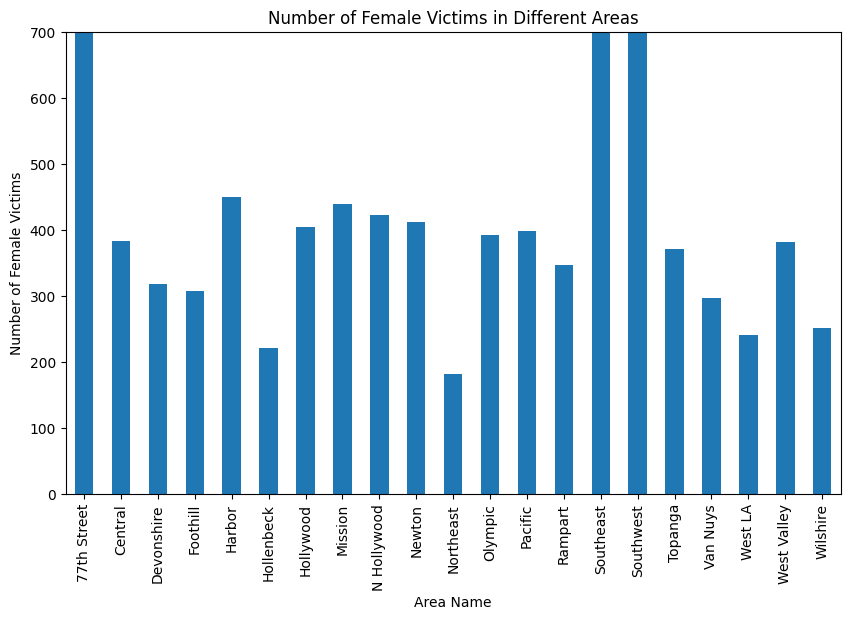

In [174]:
female_counts = (df[df['Vict Sex'] == 'F']['AREA NAME'].value_counts()).sort_index()
plt.figure(figsize=(10, 6))

female_counts.plot(kind='bar')
plt.xlabel('Area Name')
plt.ylabel('Number of Female Victims')
plt.title('Number of Female Victims in Different Areas')

plt.ylim(0, 700)

plt.show()


In [175]:
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(p)

3.063264359078526e-31


**Observations**

Given the above information we can see that the p-value is 3.06e-31 which is less than the alpha value of 0.05. This means that we reject the null hypothesis meaning we can confidently say that there is a correlation between the gender of the victim and the area the crime took place.


# **Statistical Method 2: ANOVA - Test:**


Our next test is an Analysis of Variance (ANOVA). We aim to explore the relationship between the time of occurrence (morning, noon, and night) and the age of victims. ANOVA will help us determine if there is a statistically significant difference in the mean age of victims across these different time periods.

Null Hypothesis (H0): There is no difference in the mean age of victims across all time periods (morning, noon, and night).

Alternative Hypothesis (HA): There is a difference in the mean age of victims across at least one time period.

This hypothesis testing will allow us to investigate whether there exists any significant relationship between the time of occurrence and the age of victims in our dataset.

ANOVA - Overall Correlation between Age of Victims and Time of Occurrence:
F-statistic: 44.88127328821802
P-value: 3.596530141102993e-20


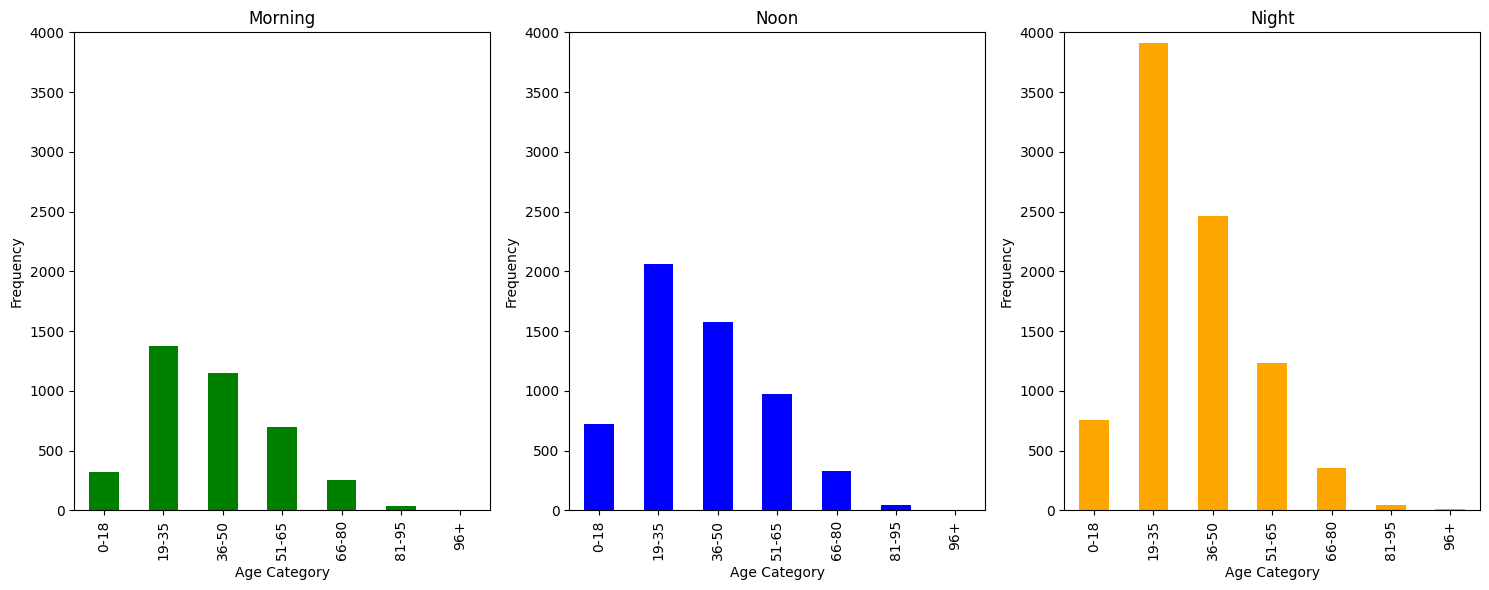

In [176]:
df_copy = df.copy()


df_copy[['Hour', 'Minute']] = df_copy['TIME OCC'].str.split(':', expand=True)

df_copy['Hour'] = df_copy['Hour'].astype(int)

morning_time_range = (df_copy['Hour'] >= 6) & (df_copy['Hour'] < 12)  # Morning-> 6:00 to 12:00
noon_time_range = (df_copy['Hour'] >= 12) & (df_copy['Hour'] < 18)    # Noon-> 12:00 to 18:00
night_time_range = ~(morning_time_range | noon_time_range)  # Night-> Everything else

morning_group = df_copy[morning_time_range]['Vict Age']
noon_group = df_copy[noon_time_range]['Vict Age']
night_group = df_copy[night_time_range]['Vict Age']

age_bins = [0, 18, 35, 50, 65, 80, 95, 100]
age_labels = ['0-18', '19-35', '36-50', '51-65', '66-80', '81-95', '96+']

df_copy['Age Category'] = pd.cut(df_copy['Vict Age'], bins=age_bins, labels=age_labels, right=False)

f_statistic, p_value = f_oneway(morning_group, noon_group, night_group)

print("ANOVA - Overall Correlation between Age of Victims and Time of Occurrence:")
print("F-statistic:", f_statistic)
print("P-value:", p_value)

plt.figure(figsize=(15, 6))

# Morning
plt.subplot(1, 3, 1)
df_copy[morning_time_range]['Age Category'].value_counts().sort_index().plot(kind='bar', color='green')
plt.title('Morning')
plt.xlabel('Age Category')
plt.ylabel('Frequency')
plt.ylim(0, 4000)

# Noon
plt.subplot(1, 3, 2)
df_copy[noon_time_range]['Age Category'].value_counts().sort_index().plot(kind='bar', color='blue')
plt.title('Noon')
plt.xlabel('Age Category')
plt.ylabel('Frequency')
plt.ylim(0, 4000)

# Night
plt.subplot(1, 3, 3)
df_copy[night_time_range]['Age Category'].value_counts().sort_index().plot(kind='bar', color='orange')
plt.title('Night')
plt.xlabel('Age Category')
plt.ylabel('Frequency')
plt.ylim(0, 4000)

plt.tight_layout()
plt.show()


Based on the results of the ANOVA test conducted to examine the correlation between the age of victims and the time of occurrence (morning, noon, and night), we have the following conclusions:

Since the p-value of 3.596e-20 which is less than the alpha value of 0.05.

The null hypothesis (H0), which states that there is no difference in the mean age of victims across different time periods, is rejected. This decision is supported by a statistically significant F-statistic and an extremely small p-value .

Therefore, we accept the alternative hypothesis (HA), indicating that there is indeed a difference in the mean age of victims across at least one time period. This implies that the time of occurrence significantly influences the age distribution of victims.

In practical terms, these findings suggest that certain time periods may be associated with distinct age demographics among victims of crime. Further analysis and investigation could delve into the specific factors contributing to these observed differences in victim age across different times of the day.

**Observations:**
* There is a higher rate of crime in the night which is expected
* The incidence of victims aged 0-18 shows an upward trend from morning to noon, potentially attributable to the conclusion of school hours during this period.
* As the age of the victim increases, the frequency of crimes decreases (left skewed).

Now,  we will explore the relationship between the time of occurrence (morning, noon, and night) and the gender of victims. ANOVA will help us determine if there is a statistically significant difference in the proportion of male and female victims across these different time periods.

Null Hypothesis (H0): There is no difference in the proportion of male and female victims across all time periods (morning, noon, and night).

Alternative Hypothesis (HA): There is a difference in the proportion of male and female victims across at least one time period.

This hypothesis testing will allow us to investigate whether there exists any significant relationship between the time of occurrence and the gender of victims in our dataset.

ANOVA - Overall Correlation between Sex of Victims and Time of Occurrence:
F-statistic: 3.4921640567687287
P-value: 0.0304551894145455


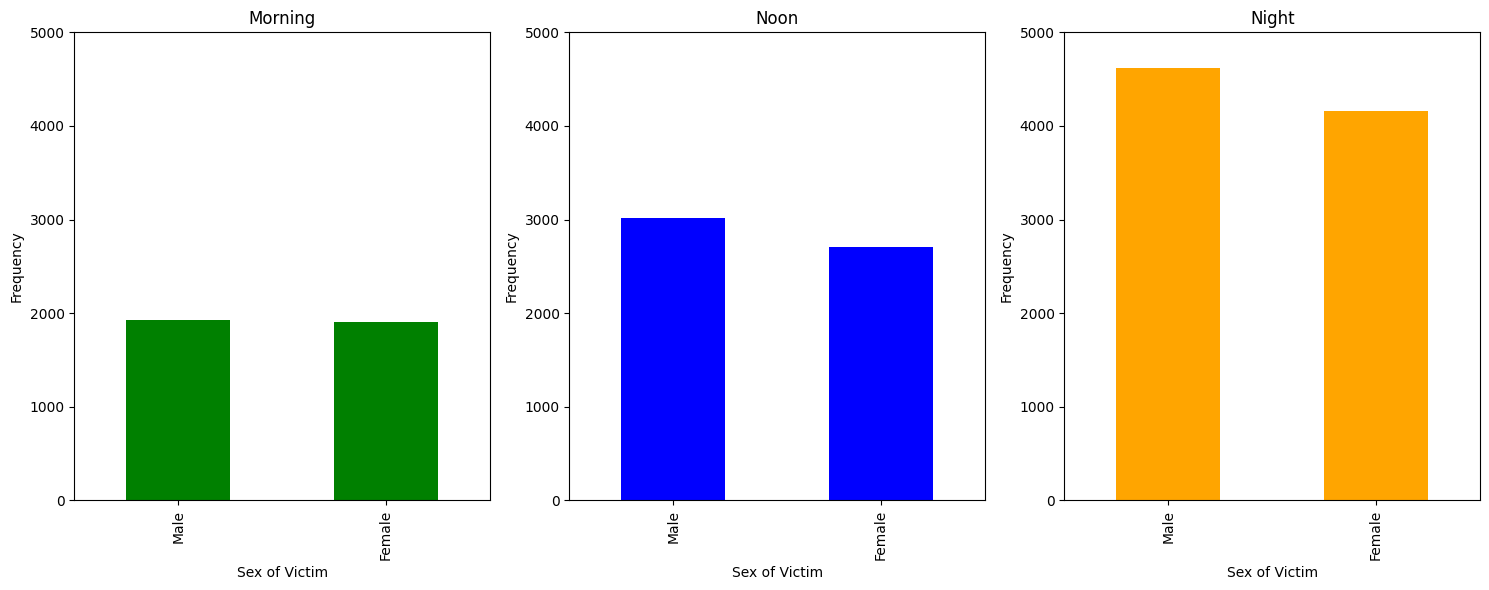

In [177]:
df_copy = df.copy()

df_copy[['Hour', 'Minute']] = df_copy['TIME OCC'].str.split(':', expand=True)

df_copy['Hour'] = df_copy['Hour'].astype(int)

morning_time_range = (df_copy['Hour'] >= 6) & (df_copy['Hour'] < 12)  # Morning-> 6:00 to 12:00
noon_time_range = (df_copy['Hour'] >= 12) & (df_copy['Hour'] < 18)    # Noon-> 12:00 to 18:00
night_time_range = ~(morning_time_range | noon_time_range)  # Night-> Everything else

morning_group = df_copy[morning_time_range]['Vict Sex'].replace({'M': 0, 'F': 1})
noon_group = df_copy[noon_time_range]['Vict Sex'].replace({'M': 0, 'F': 1})
night_group = df_copy[night_time_range]['Vict Sex'].replace({'M': 0, 'F': 1})

f_statistic, p_value = f_oneway(morning_group, noon_group, night_group)

print("ANOVA - Overall Correlation between Sex of Victims and Time of Occurrence:")
print("F-statistic:", f_statistic)
print("P-value:", p_value)

plt.figure(figsize=(15, 6))

# Morning
plt.subplot(1, 3, 1)
morning_group.value_counts().sort_index().plot(kind='bar', color='green')
plt.title('Morning')
plt.xlabel('Sex of Victim')
plt.ylabel('Frequency')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])
plt.ylim(0, 5000)


# Noon
plt.subplot(1, 3, 2)
noon_group.value_counts().sort_index().plot(kind='bar', color='blue')
plt.title('Noon')
plt.xlabel('Sex of Victim')
plt.ylabel('Frequency')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])
plt.ylim(0, 5000)


# Night
plt.subplot(1, 3, 3)
night_group.value_counts().sort_index().plot(kind='bar', color='orange')
plt.title('Night')
plt.xlabel('Sex of Victim')
plt.ylabel('Frequency')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])
plt.ylim(0, 5000)


plt.tight_layout()
plt.show()


Based on the results of the ANOVA test examining the correlation between the gender of victims and the time of occurrence (morning, noon, and night), we can draw the following conclusions:

Since the p-value of 0.03 which is less than the alpha value of 0.05.


The null hypothesis (H0), which suggests that there is no difference in the mean gender of victims across different time periods, is rejected due to a statistically significant p-value.

Consequently, we accept the alternative hypothesis (HA), indicating that there is a difference in the mean gender of victims across at least one time period. Looking at the bar graphs we can see that at any time of day, the number of male victims are higher than the females if not the same.

These findings suggest that the time of occurrence indeed has an impact on the gender distribution of victims. Further analysis and investigation may be warranted to understand the underlying factors contributing to this difference and its implications in crime prevention and intervention strategies.

# **Statistical Method 3: Box and Whisker Plot**

 **Bar Graph:**

Here we are dipcting a bar graph that shows us a visual representation of the number of male and female victims in different areas. We then use this graph and the one above to compare the number of female and male victims in each area.

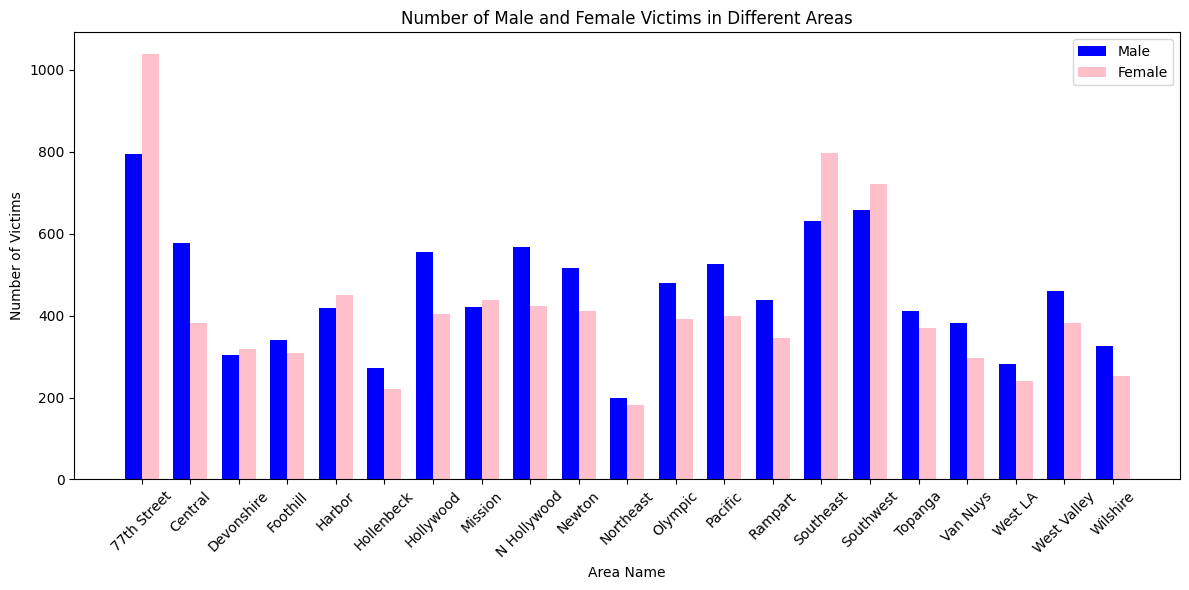

In [178]:
male_counts = (df[df['Vict Sex'] == 'M']['AREA NAME'].value_counts()).sort_index()
female_counts = (df[df['Vict Sex'] == 'F']['AREA NAME'].value_counts()).sort_index()

bar_width = 0.35

x = range(len(male_counts))

plt.figure(figsize=(12, 6))
plt.bar(x, male_counts, bar_width, label='Male', color='blue')
plt.bar([i + bar_width for i in x], female_counts, bar_width, label='Female', color='pink')

plt.xlabel('Area Name')
plt.ylabel('Number of Victims')
plt.title('Number of Male and Female Victims in Different Areas')
plt.xticks([i + bar_width/2 for i in x], male_counts.index, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

In [179]:
m = 0
f = 0
for location in male_counts.index:
    male_count = male_counts[location]
    female_count = female_counts.get(location, 0)
    print(f"{location}, M: {male_count}, F: {female_count}")
    if male_count > female_count:
      m += 1
    else:
      f += 1
print(f"{m} Areas where there is a greater number of Male victims compared to Female.")
print(f"{f} Areas where there is a greater number of Female victims compared to Male.")

77th Street, M: 796, F: 1040
Central, M: 578, F: 383
Devonshire, M: 305, F: 318
Foothill, M: 341, F: 308
Harbor, M: 418, F: 450
Hollenbeck, M: 273, F: 221
Hollywood, M: 555, F: 404
Mission, M: 420, F: 439
N Hollywood, M: 568, F: 423
Newton, M: 516, F: 412
Northeast, M: 198, F: 181
Olympic, M: 479, F: 392
Pacific, M: 525, F: 398
Rampart, M: 439, F: 346
Southeast, M: 630, F: 797
Southwest, M: 657, F: 721
Topanga, M: 412, F: 371
Van Nuys, M: 381, F: 296
West LA, M: 283, F: 240
West Valley, M: 460, F: 381
Wilshire, M: 325, F: 252
15 Areas where there is a greater number of Male victims compared to Female.
6 Areas where there is a greater number of Female victims compared to Male.


**Observations:**
* Overall, in most areas, there are more male victims compared to female victims.
* The area with the highest number of male victims is 77th Street, with 796 male victims.
* The area with the highest number of female victims is Southeast, with 797 female victims.
* Central and Hollywood are notable areas with a relatively higher number of female victims compared to male victims.
* Harbor, Mission, N Hollywood, and Pacific are areas where the number of male and female victims is relatively close.
* Northeast and West LA are among the areas with the lowest total number of victims, both male and female combined.
* The distribution of victims, both male and female, varies across different areas, which could indicate variations in crime patterns, demographics, or law enforcement practices.


Next, we are plotting a boxplot that provides information on how the numbers of crimes committed to women is distributed based on location. This will give us information on outliers, skew, and variability. We are also plotting a boxplot tha tprovides information on hwo the number of crimes committed to men is distributed based on location. We will compare the two distributions.

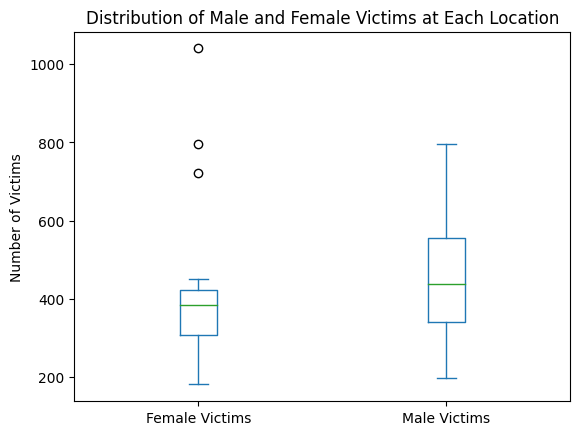

In [180]:
# Pandas dataframe
data = pd.DataFrame({"Female Victims": female_counts, "Male Victims": male_counts})

# Plot the dataframe
ax = data[['Female Victims', 'Male Victims']].plot(kind='box', title='boxplot')

# Display the plot
plt.title("Distribution of Male and Female Victims at Each Location")
plt.ylabel("Number of Victims")
plt.show()

**Observations:**

There are a few charactersitics that can be observed from the female boxplot above. The median lies around 390-400 and the interquartile range is about 100, meaning there is low amounts of variability. Additionally, there is a very obvious left/negative skew in data, meaning that the data is the first half  is more spread out than the data in the second half.  Finally, we notice that there are very obvious outliers at around 1050, 800, and 720 (we can notice the actual values are 1040, 797, and 721, respectively by looking at the data), which corresponds to the number of female victims at 77th street, Southeast M and Southwest M, respectively. It will take a more detailed analysis to understand why this may be.

For the male boxplot, the median lies around 450, suggesting that there is a higher expected number of male victims at any location than for female victims. However, the spread is much different, having an interquartile range of more than 200. Additionally, the skew is much different than the female distribution, as the overall distribution seems to have relatively no skew (with a slight right/positive skew in the overall distribution). It will take a more detailed analysis to understand why this may be.

# **Choosing an ML Technique**

As we recognized in our data visualization and exploratory analysis, we were able to notice that there is a strong relationship between gender of the victim and the location the crime occurred. We want to create a predictive model that will tell us the predicted gender of victim for an unknown gender-labeled victim.

First, let's take a look at our current dataset.

In [181]:
display(df.head())
df.columns

,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Vict Sex,Vict Descent,Premis Cd,Weapon Used Cd,LAT,LON
875845,2024-01-21,15:10,6,Hollywood,668,2,624,22,F,B,517.0,400.0,34.0944,-118.3125
875846,2024-03-22,18:15,21,Topanga,2145,2,624,58,M,O,102.0,400.0,34.1876,-118.6070
875848,2024-01-26,18:08,9,Van Nuys,932,2,624,26,F,H,210.0,500.0,34.1867,-118.4553
875852,2024-01-27,17:42,20,Olympic,2074,1,230,53,M,W,502.0,512.0,34.0437,-118.3029
875855,2024-03-03,17:15,19,Mission,1954,2,624,33,F,W,102.0,400.0,34.2519,-118.4673


Index(['DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME', 'Rpt Dist No', 'Part 1-2',
       'Crm Cd', 'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd',
       'Weapon Used Cd', 'LAT', 'LON'],
      dtype='object')

Next, let's split the data

In [182]:
Y = df['Vict Sex']
X = df['AREA']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

We will run a Logistic Regression Classification because it is useful when the dependent variable is categorical, which ours is (Victim Sex is categorical, Female & Male)

In [183]:
#We create a model using just Area as the independent variable
X_train = np.array(X_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)
model = LogisticRegression(random_state=0)
model.fit(X_train,Y_train)
results = model.predict(X_test)

#Then we display the confusion matrix, accuracy score, and classification report to determine the performance of our model
display(confusion_matrix(Y_test, results))

print(f"Accuracy: {accuracy_score(Y_test, results)}")
print(classification_report(Y_test, results))

print(np.unique(results))

array([[   0, 2556],
       [   0, 2944]])

Accuracy: 0.5352727272727272


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           F       0.00      0.00      0.00      2556
           M       0.54      1.00      0.70      2944

    accuracy                           0.54      5500
   macro avg       0.27      0.50      0.35      5500
weighted avg       0.29      0.54      0.37      5500

['M']


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


As you can see from the confusion matrix we created, there are a lot of false positive predictions. This means that many observations were predicted to be Male when they were meant to be Female. This is a big issue. Because of this, we may need to add more independent variables to use this

In [184]:
#Here, we can take out AREA NAME because it can also be measured b AREA (we did not take it out before because it was used for exploratory analysis)
df = df.drop(columns = ['AREA NAME'])
df.head()

,DATE OCC,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Vict Sex,Vict Descent,Premis Cd,Weapon Used Cd,LAT,LON
875845,2024-01-21,15:10,6,668,2,624,22,F,B,517.0,400.0,34.0944,-118.3125
875846,2024-03-22,18:15,21,2145,2,624,58,M,O,102.0,400.0,34.1876,-118.6070
875848,2024-01-26,18:08,9,932,2,624,26,F,H,210.0,500.0,34.1867,-118.4553
875852,2024-01-27,17:42,20,2074,1,230,53,M,W,502.0,512.0,34.0437,-118.3029
875855,2024-03-03,17:15,19,1954,2,624,33,F,W,102.0,400.0,34.2519,-118.4673


In [185]:
# Here, we are changing the Date and Time columns to processable values for the model
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])
df['TIME OCC'] = pd.to_datetime(df['TIME OCC'])
df['year'] = df['DATE OCC'].dt.year
df['month'] = df['DATE OCC'].dt.month
df['day'] = df['DATE OCC'].dt.day

# We are using the one-hot encoding to change the categorical variables into binary numerical values for easier processing
df = pd.get_dummies(df, columns = ['Vict Descent', 'AREA', 'Crm Cd', 'Vict Age', 'Weapon Used Cd'])

Y = df['Vict Sex']
X = df.drop(columns = ['Vict Sex', 'DATE OCC', 'TIME OCC'])

# Then, we are splitting the data into training and testing set and scaling them
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# We then create the model and perform cross validation to prevent overfitting
model = LogisticRegression(random_state=0)

scores = cross_val_score(model, X_train_scaled, np.ravel(Y_train))
print(f"Mean: {np.mean(scores)}, Standard Deviation: {np.std(scores)}")


<ipython-input-185-93ad31a80f1e>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['TIME OCC'] = pd.to_datetime(df['TIME OCC'])
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (ma

Mean: 0.6660699185446556, Standard Deviation: 0.007252745694147217


In [186]:
#Then we display the confusion matrix, accuracy score, and classification report to determine the performance of our model
model.fit(X_train_scaled,np.ravel(Y_train))
results = model.predict(X_test_scaled)
display(confusion_matrix(Y_test, results))

print(f"Accuracy: {accuracy_score(Y_test, results)}")
print(classification_report(Y_test, results))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[1569, 1046],
       [ 735, 2150]])

Accuracy: 0.6761818181818182
              precision    recall  f1-score   support

           F       0.68      0.60      0.64      2615
           M       0.67      0.75      0.71      2885

    accuracy                           0.68      5500
   macro avg       0.68      0.67      0.67      5500
weighted avg       0.68      0.68      0.67      5500



We have improved our acurracy, precision, and recall, however, we have increased our dimensionality tremendously. We will use PCA to reduce the number of features to use in our model to prevent the Curse of Dimensionality.

In [187]:
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X)

#After performing PCA, we redo the previous performance analysis
X_train_pca, X_test_pca, Y_train_pca, Y_test_pca = train_test_split(X_pca, Y, test_size = 0.3)

scaler = StandardScaler()
X_train_scaled_pca = scaler.fit_transform(X_train_pca)
X_test_scaled_pca = scaler.fit_transform(X_test_pca)

model_pca = LogisticRegression(random_state=0)

scores = cross_val_score(model_pca, X_train_scaled, np.ravel(Y_train_pca))
print(f"Mean: {np.mean(scores)}, Standard Deviation: {np.std(scores)}")

model_pca.fit(X_train_scaled_pca,np.ravel(Y_train_pca))
results_pca = model_pca.predict(X_test_scaled_pca)
display(confusion_matrix(Y_test_pca, results_pca))

print(f"Accuracy: {accuracy_score(Y_test_pca, results_pca)}")
print(classification_report(Y_test_pca, results_pca))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Mean: 0.4982869388767622, Standard Deviation: 0.007758264777634721


array([[1473, 1137],
       [1147, 1743]])

Accuracy: 0.5847272727272728
              precision    recall  f1-score   support

           F       0.56      0.56      0.56      2610
           M       0.61      0.60      0.60      2890

    accuracy                           0.58      5500
   macro avg       0.58      0.58      0.58      5500
weighted avg       0.58      0.58      0.58      5500



As we can see, our accuracy decreased by around 7-8%, so we decided that it would not be worth reducing dimensionality and sacrificing our accuracy, precision, and recall. Thus, we will stick with our pre-PCA model.

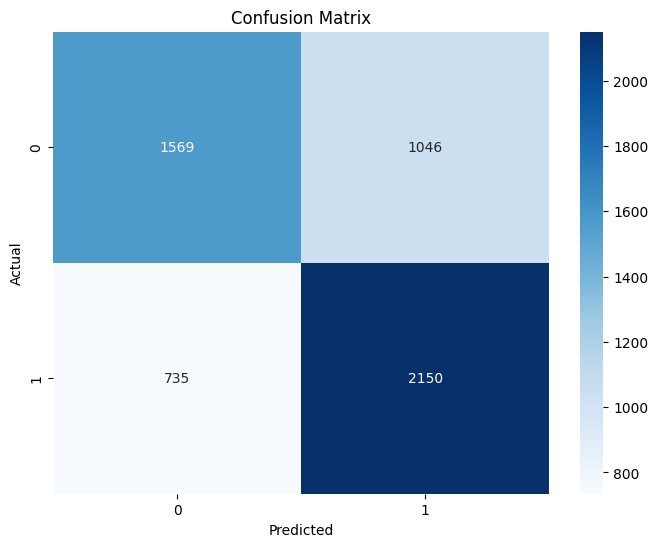

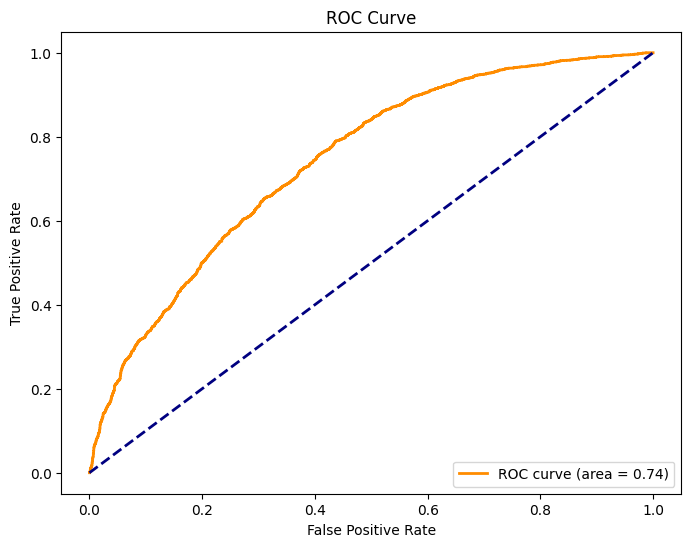

In [188]:
# Confusion Matrix
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# ROC Curve
def plot_roc_curve(y_true, y_pred_proba):

    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()


# Assuming you have y_test and predicted probabilities of class 1 (y_pred_proba)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
y_pred = model.predict(X_test_scaled)

# Plotting Confusion Matrix
plot_confusion_matrix(Y_test, y_pred)

# Plotting ROC Curve
# Encode categorical labels to binary format
le = LabelEncoder()
Y_test_binary = le.fit_transform(Y_test)

plot_roc_curve(Y_test_binary, y_pred_proba)


Our plots show the accuracy of our model.
The Confusion Matrix visually represents true positives (true males that were predicted male), false positives (females wrongfully predicted male), false negatives (males wrongfully predicted female), and true negatives (true females that were predicted female). Our confusion matrix shows that majority of the outputs were true positives and true negatives, however, there is still a somewhat prevalent proporiton of false positives and false negatives.

Furthermore, in the ROC curve graph, the line y=x represents a random classifier that has no predictive power. Thus, an ROC curve that has a larger area under the curve is one that represents a model that has high classification power. If the curve is closer to the top left corner of the graph, then the model is good at determining the correct class of data. Our model seems to have a relatively large area under the curve and is not too close to the y=x line. This suggests that we have a relatively strong model in determining the correct sex of the victim.

# Insights & Conclusions

Throughout this project, we aimed to explore crime trends in Los Angeles using data from 2024. Our analysis focused on identifying potential correlations between demographic variables, economic indicators, and societal factors with crime occurrences. We also sought to create predictive models to help in cases where there is a lack of vital information.

Based on our observations, we can suggest that:

* Crime rates are generally higher during the night, with a slight increase in the early morning hours. This trend suggests that increased law enforcement presence and community awareness during these hours could help in deterring crime.

* There is a significant correlation between the gender of the victim and the area where the crime occurred. This finding can help law enforcement agencies and community organizations to develop targeted strategies to ensure the safety of all residents in each area.

* Age and time of occurrence are also correlated. ANOVA test results indicate a statistically significant difference in the mean age of victims across different time periods. This suggests that certain time periods may be associated with distinct age demographics among victims of crime, which could inform crime prevention strategies.

* Machine learning models, such as Logistic Regression, can be used to predict the gender of a victim based on various features, potentially assisting law enforcement in their investigations. We attempted PCA Dimensionality Reduction, however, it decreased the reliability of our model. This model can be used to predict the gender of a victim based on various features, potentially assisting law enforcement in their investigations.

For future analysis, expanding the dataset to include more years and a wider range of crimes could provide further insights. Additionally, focusing on crimes with lower frequencies and analyzing the effectiveness of existing strategies for those crimes could help inform strategies for addressing higher frequency crimes. Overall, the findings from this project can contribute to a better understanding of crime trends in Los Angeles and help inform data-driven strategies for improving community safety.

We hope this tutorial not only highlighted these conclusions but also gave you insight into the data analysis process.